# Computer Vision

## Lab 1


### Imports

- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [ ] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)


In [6]:
# Computation
import cv2
import numpy as np
import scipy
from skimage import color

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

### Filter Kernels


In [2]:
prewitt_vertical = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_horizontal = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
laplacian_2d = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

### Section 2 - Define Images


In [39]:
# RGB
image_35 = np.array(cv2.imread("./assets/image-35.jpg")[:,:,::-1], dtype=np.uint8)
image_83 = np.array(cv2.imread("./assets/image-83.jpg")[:,:,::-1], dtype=np.uint8)
image_110 = np.array(cv2.imread("./assets/image-110.jpg")[:,:,::-1], dtype=np.uint8)

images = [image_35, image_83, image_110]
num_images = len(images)

# Grayscale
grayscale_35 = color.rgb2gray(image_35)
grayscale_83 = color.rgb2gray(image_83)
grayscale_110 = color.rgb2gray(image_110)

grayscales = [grayscale_35, grayscale_83, grayscale_110]
num_grayscales = len(grayscales)

# HSV
hsv_35 = color.rgb2hsv(image_35)
hsv_83 = color.rgb2hsv(image_83)
hsv_110 = color.rgb2hsv(image_110)

hsvs = [hsv_35, hsv_83, hsv_110]
num_hsvs = len(hsvs)

# Masks
mask_35 = np.array(cv2.imread("./assets/mask-35.png")[:,:,::-1], dtype=np.uint8)
mask_83 = np.array(cv2.imread("./assets/mask-83.png")[:,:,::-1], dtype=np.uint8)
mask_110 = np.array(cv2.imread("./assets/mask-110.png")[:,:,::-1], dtype=np.uint8)

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# All
all = images + masks

### Section 3 - Display Images


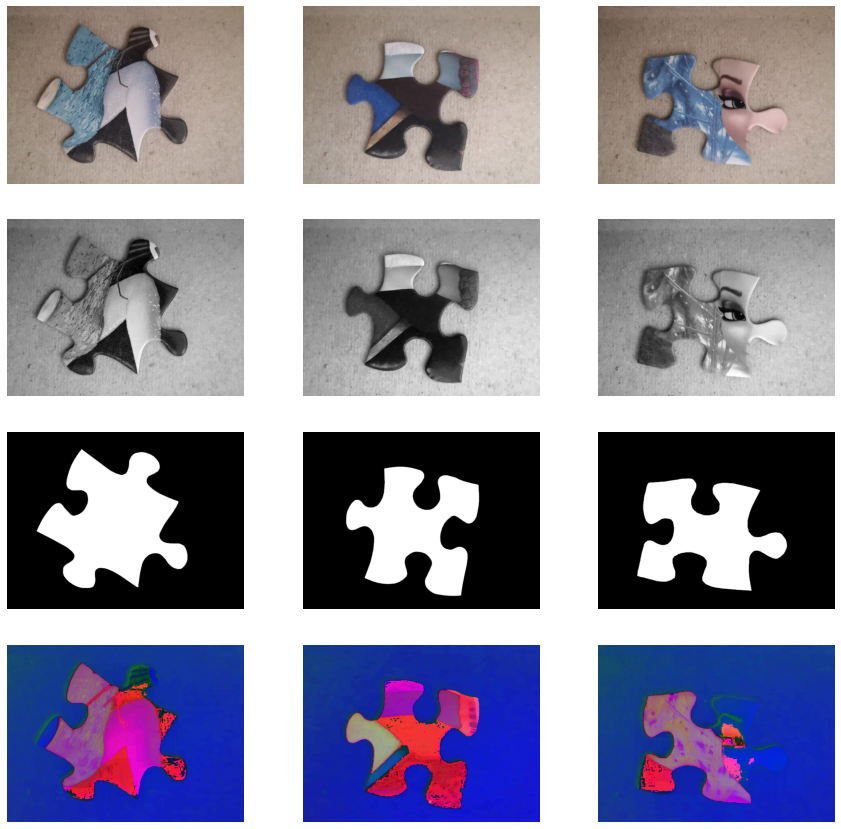

In [40]:
fig = plt.figure(figsize=(num_images * 5, 15))

for image, grayscale, mask, hsv, i in zip(images, grayscales, masks, hsvs, range(num_images)):
    fig.add_subplot(4, num_images, i+1)
    plt.imshow(image)
    plt.axis('off')

    fig.add_subplot(4, num_images, num_images+i+1)
    plt.imshow(grayscale, cmap="gray")
    plt.axis('off')

    fig.add_subplot(4, num_images, 2*num_images+i+1)
    plt.imshow(mask)
    plt.axis('off')

    fig.add_subplot(4, num_images, 3*num_images+i+1)
    plt.imshow(hsv)
    plt.axis('off')

### Section 4 - Descriptive Statistics


#### Statistics

In [36]:
rows = [
  "width",
  "height",
  "total pixels",
  "black pixels",
  "white pixels",
  "gray min",
  "gray max",
  "puzzle min",
  "puzzle max",
  "bg min",
  "bg max",
  "gray mean",
  "puzzle mean",
  "bg mean",
  "puzzle var",
  "bg var",
]

columns = [
    "image-35",
    "image-83",
    "image-110"
]

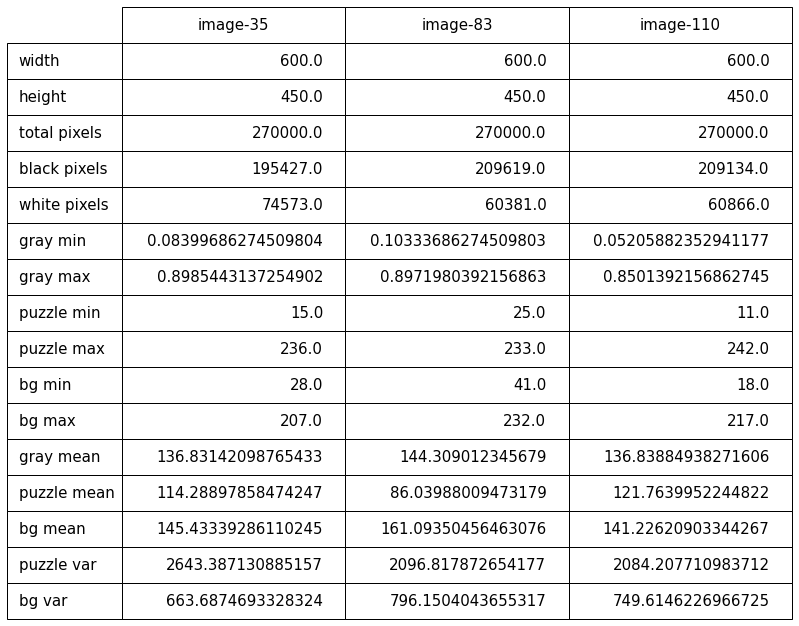

In [59]:
cell_text = np.zeros((len(rows), len(columns)))

for image, grayscale, mask, i in zip(images, grayscales, masks, range(num_images)):
  image_height, image_width, image_channels = image.shape

  # 1. Image width
  cell_text[0, i] = image_width

  # 2. Image height
  cell_text[1, i] = image_height

  # 3. No. Pixels
  image_pixels = image_width * image_height
  cell_text[2, i] = image_pixels

  # 4. Mask Black Pixels
  mask_black = mask.mean(axis=2) < 128
  black_pixels = np.count_nonzero(mask_black)
  cell_text[3, i] = black_pixels

  # 5. Mask White Pixels
  mask_white = np.invert(mask_black)
  cell_text[4, i] = image_pixels - black_pixels

  # 6. Gayscale Min
  cell_text[5, i] = grayscale.min()

  # 7. Gayscale Max
  cell_text[6, i] = grayscale.max()

  # 8. Puzzle MinMax
  image_puzzle = image[mask_white]
  cell_text[7, i] = image_puzzle.min()
  cell_text[8, i] = image_puzzle.max()

  # 9. Background MinMax
  image_background = image[mask_black]
  cell_text[9, i] = image_background.min()
  cell_text[10, i] = image_background.max()

  # 10. Mean pixel intensity
  cell_text[11, i] = image.mean()

  # 11. Puzzle Mean pixel intensity
  cell_text[12, i] = image_puzzle.mean()

  # 12. Background Mean pixel intensity
  cell_text[13, i] = image_background.mean()

  # 13. Puzzle pixel intensity Variance
  cell_text[14, i] = image_puzzle.var()

  # 14. Background pixel intensity Variance
  cell_text[15, i] = image_background.var()

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
table = plt.table(cellText=cell_text,
          rowLabels=rows,
          colLabels=columns,
          loc='center')
table.set_fontsize(18)
table.scale(2, 3)

#### Histograms


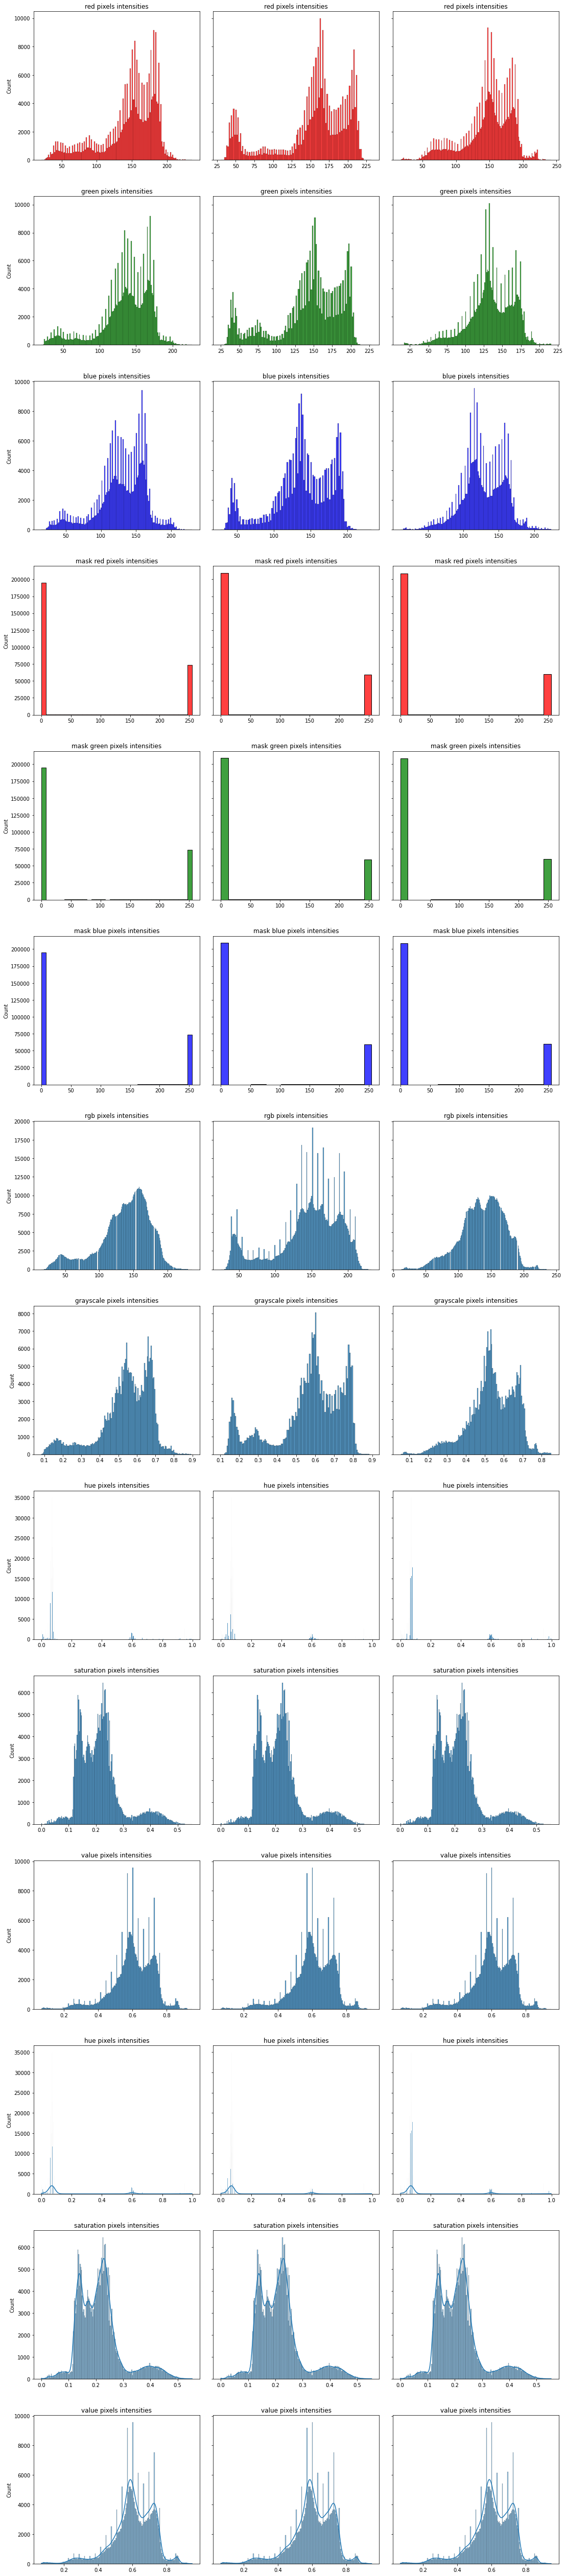

In [44]:
fig, axes = plt.subplots(14, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 14)
fig.tight_layout(h_pad=5)


for image, grayscale, mask, i in zip(images, grayscales, masks, range(num_images)):
    # 15. Image red pixel intensity histogram
    sns.histplot(
        ax=axes[0, i],
        data=image[:, :, 0].flatten(),
        color="r"
    ).set(
        title=f"red pixels intensities"
    )

    # 16. Image green pixel intensity histogram
    sns.histplot(
        ax=axes[1, i],
        data=image[:, :, 1].flatten(),
        color="g"
    ).set(
        title=f"green pixels intensities"
    )

    # 17. Image blue pixel intensity histogram
    sns.histplot(
        ax=axes[2, i],
        data=image[:, :, 2].flatten(),
        color="b"
    ).set(
        title=f"blue pixels intensities"
    )

    # 18.1 Mask red pixel intensity histogram
    sns.histplot(
        ax=axes[3, i],
        data=mask[:, :, 0].flatten(),
        color="r"
    ).set(
        title=f"mask red pixels intensities"
    )

    # 18.2 Mask green pixel intensity histogram
    sns.histplot(
        ax=axes[4, i],
        data=mask[:, :, 1].flatten(),
        color="g"
    ).set(
        title=f"mask green pixels intensities"
    )

    # 18.3 Mask blue pixel intensity histogram
    sns.histplot(
        ax=axes[5, i],
        data=mask[:, :, 2].flatten(),
        color="b"
    ).set(
        title=f"mask blue pixels intensities"
    )
    
    # 19. 
    sns.histplot(
        ax=axes[6, i],
        data=image.flatten()
    ).set(
        title=f"rgb pixels intensities"
    )

    # 20. 
    sns.histplot(
        ax=axes[7, i],
        data=grayscale.flatten()
    ).set(
        title=f"grayscale pixels intensities"
    )

    # 21.1 Hue pixel intensity histogram
    sns.histplot(
        ax=axes[8, i],
        data=hsv[:, :, 0].flatten()
    ).set(
        title=f"hue pixels intensities"
    )

    # 21.2 Saturation pixel intensity histogram
    sns.histplot(
        ax=axes[9, i],
        data=hsv[:, :, 1].flatten()
    ).set(
        title=f"saturation pixels intensities"
    )

    # 21.3 Value pixel intensity histogram
    sns.histplot(
        ax=axes[10, i],
        data=hsv[:, :, 2].flatten()
    ).set(
        title=f"value pixels intensities"
    )

    # 22.1 Hue pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[11, i],
        data=hsv[:, :, 0].flatten(),
        kde=True
    ).set(
        title=f"hue pixels intensities"
    )

    # 22.2 Saturation pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[12, i],
        data=hsv[:, :, 1].flatten(),
        kde=True
    ).set(
        title=f"saturation pixels intensities"
    )

    # 22.3 Value pixel intensity histogram (Kernel Density Estimates)
    sns.histplot(
        ax=axes[13, i],
        data=hsv[:, :, 2].flatten(),
        kde=True
    ).set(
        title=f"value pixels intensities"
    )

### Section 5 - Bonus


#### Contrast Stretching


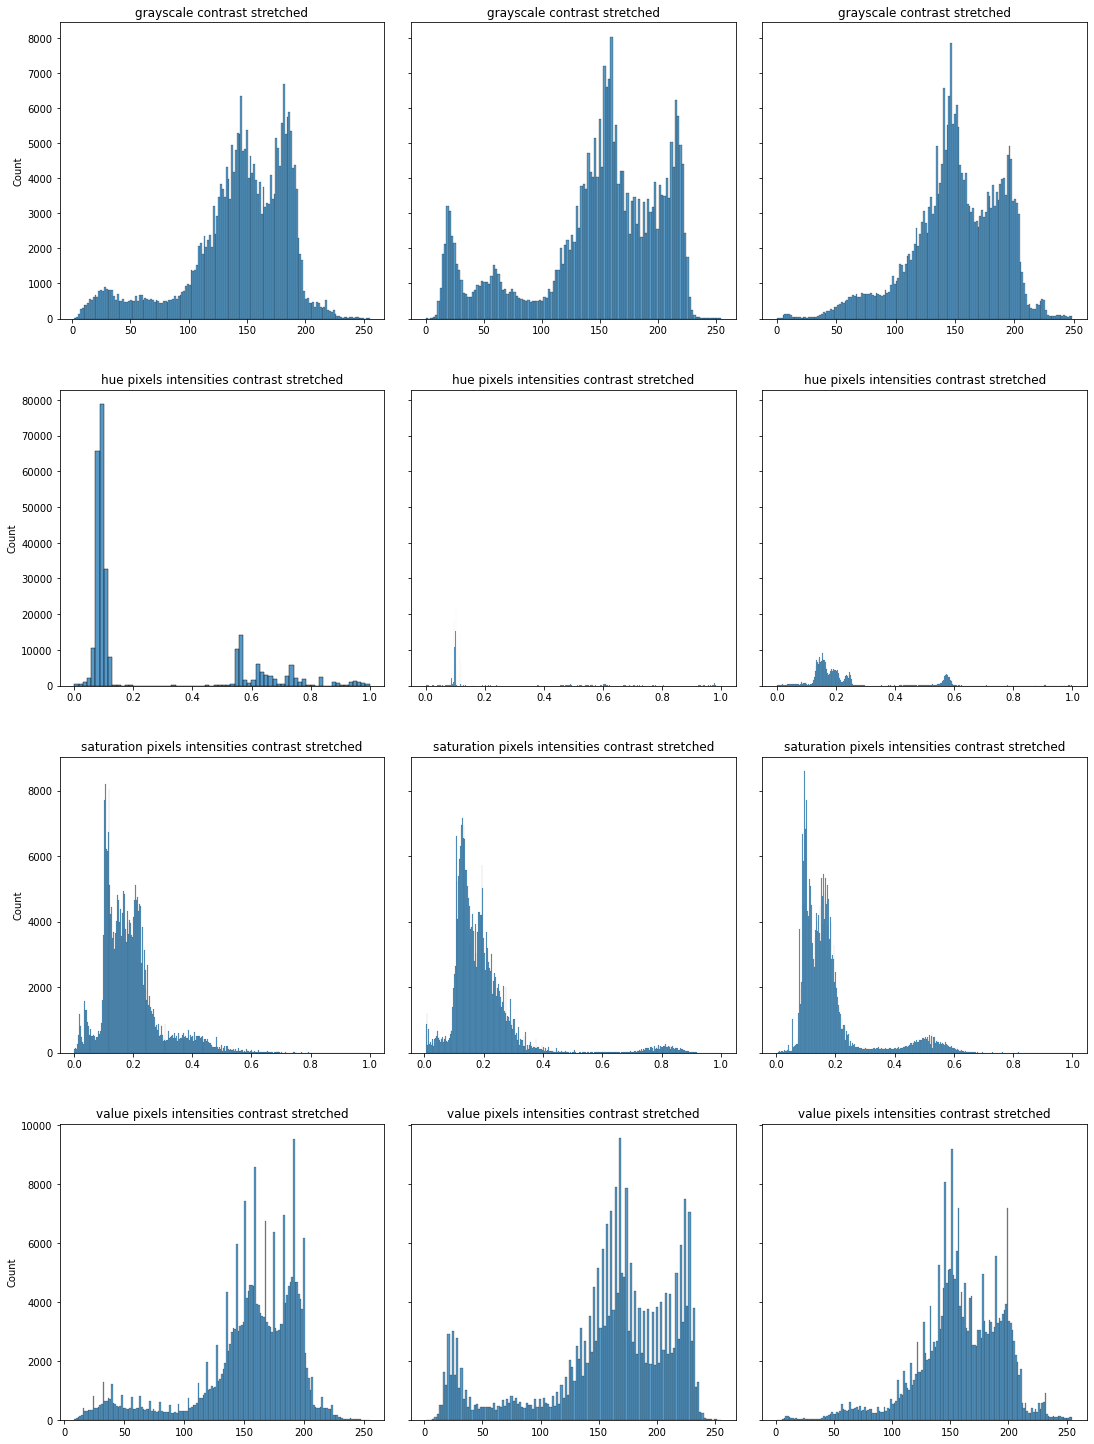

In [48]:
def channel_contrast_stretch(channel):
    channel_min, channel_max = np.amin(channel), np.amax(channel)
    return (channel - channel_min) / (channel_max - channel_min)

fig, axes = plt.subplots(4, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 4)
fig.tight_layout(h_pad=5)

for i, image in enumerate(images):
    image_float = image / 255
    image_stretched = np.zeros(image.shape)
    
    image_stretched[:, :, 0] = channel_contrast_stretch(image_float[:, :, 0])
    image_stretched[:, :, 1] = channel_contrast_stretch(image_float[:, :, 1])
    image_stretched[:, :, 2] = channel_contrast_stretch(image_float[:, :, 2])
    
    image_stretched = image_stretched * 255

    grayscale = color.rgb2gray(image_stretched)
    hsv = color.rgb2hsv(image_stretched)

    # Grayscale pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[0, i],
        data=grayscale.flatten()
    ).set(
        title=f"grayscale contrast stretched"
    )

    # Hue pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[1, i],
        data=hsv[:, :, 0].flatten()
    ).set(
        title=f"hue pixels intensities contrast stretched"
    )

    # Saturation pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[2, i],
        data=hsv[:, :, 1].flatten()
    ).set(
        title=f"saturation pixels intensities contrast stretched"
    )

    # Value pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[3, i],
        data=hsv[:, :, 2].flatten()
    ).set(
        title=f"value pixels intensities contrast stretched"
    )


#### Histogram Equalization

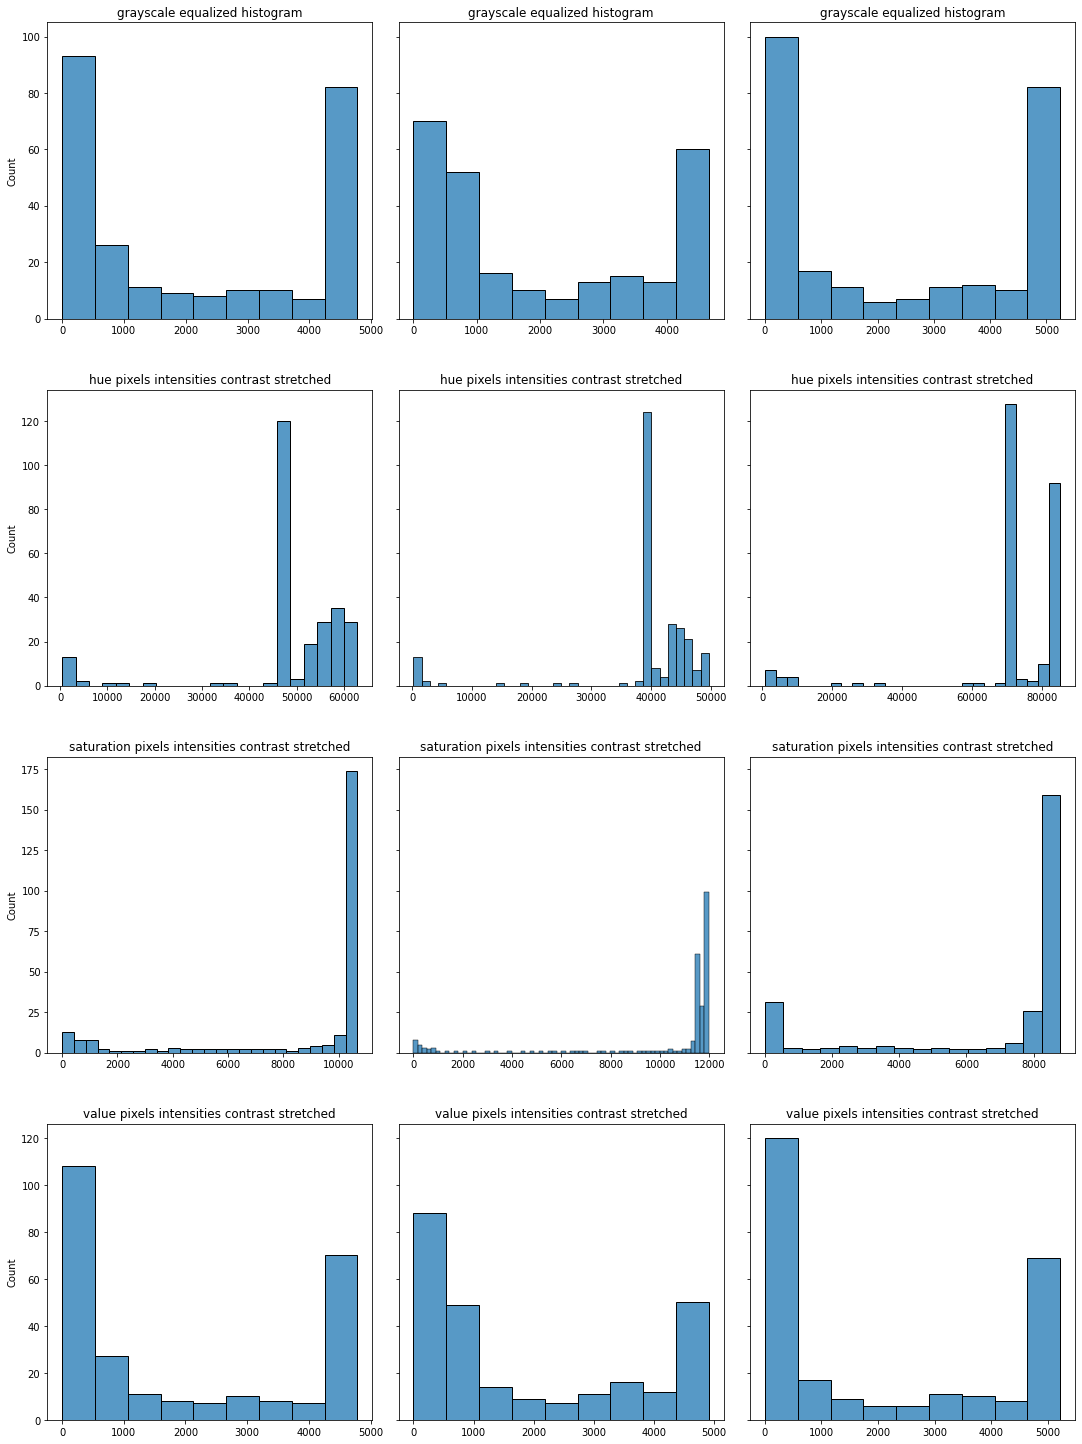

In [56]:
def channel_equalization(channel):
    hist, bins = np.histogram(channel.flatten(), 256, [0, 1])
    cdf = hist.cumsum()
    normalized = cdf * hist.max() / cdf.max()
    return normalized

fig, axes = plt.subplots(4, num_images, sharey='row')

fig.set_figwidth(5 * num_images)
fig.set_figheight(5 * 4)
fig.tight_layout(h_pad=5)

for grayscale, hsv, i in zip(grayscales, hsvs, range(num_images)):
    grayscale_equalized = channel_equalization(grayscale)
    hue_equalized = channel_equalization(hsv[:, :, 0])
    saturation_equalized = channel_equalization(hsv[:, :, 1])
    value_equalized = channel_equalization(hsv[:, :, 2])

    # Grayscale pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[0, i],
        data=grayscale_equalized.flatten()
    ).set(
        title=f"grayscale equalized histogram"
    )

    # Hue pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[1, i],
        data=hue_equalized.flatten()
    ).set(
        title=f"hue pixels intensities contrast stretched"
    )

    # Saturation pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[2, i],
        data=saturation_equalized.flatten()
    ).set(
        title=f"saturation pixels intensities contrast stretched"
    )

    # Value pixel intensity histogram for contrast stretched image
    sns.histplot(
        ax=axes[3, i],
        data=value_equalized.flatten()
    ).set(
        title=f"value pixels intensities contrast stretched"
    )

### Section 6


#### Question 1


In [60]:
def convolve(image_arr, kernel):
    """Apply a convolution to an image based on given kernel and padding type

    Args:
        image_arr (NDArray): N X M Image
        kernel (NDArray): _description_

    Returns:
        new_image_arr (NDArray): N X M Image with applied filter
    """
    # Rotate 180 for convolution
    kernel = np.rot90(kernel, k=2)

    kernel_h, kernel_w = kernel.shape
    pad_h, pad_w = kernel_h // 2, kernel_w // 2
    
    height, width = image_arr.shape
    
    pad_width = ((pad_h, pad_h), (pad_w, pad_w))
    image_pad = np.pad(image_arr, pad_width=pad_width)
    
    new_image = np.zeros(image_arr.shape)
    for i in range(height):
        for j in range(width):
            new_image[i, j] = (image_pad[i:i+kernel_h, j:j+kernel_w] * kernel).sum()
            
    return new_image

(-0.5, 599.5, 449.5, -0.5)

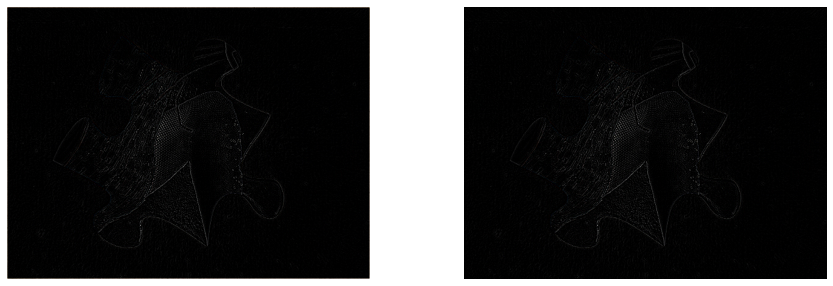

In [68]:
# Test Convolve
image_float = image_35 / 255

custom_convolution = np.zeros(image_float.shape)
custom_convolution[:,:,0] = convolve(image_float[:,:,0], laplacian_2d)
custom_convolution[:,:,1] = convolve(image_float[:,:,1], laplacian_2d)
custom_convolution[:,:,2] = convolve(image_float[:,:,2], laplacian_2d)

library_convolution = cv2.filter2D(image_float, -1, np.rot90(laplacian_2d, k=2))

fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 2, 1)
plt.imshow(custom_convolution)
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(library_convolution)
plt.axis('off')

#### Question 2


In [98]:
def get_image_features(image, hsv):
    features = np.zeros((np.prod(image.shape[:-1]), 15))
    image_float = image / 255

    image_r = image_float[:,:,0]
    image_g = image_float[:,:,1]
    image_b = image_float[:,:,2]

    # RGB
    features[:,0] = image_r.flatten()
    features[:,1] = image_g.flatten()
    features[:,2] = image_b.flatten()

    # HSV
    features[:,3] = hsv[:,:,0].flatten()
    features[:,4] = hsv[:,:,1].flatten()
    features[:,5] = hsv[:,:,2].flatten()

    # Prewitt Vertical
    features[:,6] = convolve(image_r, prewitt_vertical).flatten()
    features[:,7] = convolve(image_g, prewitt_vertical).flatten()
    features[:,8] = convolve(image_b, prewitt_vertical).flatten()

    # Prewitt Horizontal
    features[:,9] = convolve(image_r, prewitt_horizontal).flatten()
    features[:,10] = convolve(image_g, prewitt_horizontal).flatten()
    features[:,11] = convolve(image_b, prewitt_horizontal).flatten()

    # Laplacian
    features[:,12] = convolve(image_r, laplacian_2d).flatten()
    features[:,13] = convolve(image_g, laplacian_2d).flatten()
    features[:,14] = convolve(image_b, laplacian_2d).flatten()

    return features

In [99]:
training_features = get_image_features(image_35, hsv_35)

#### Question 3

In [103]:
features_mean = np.mean(training_features, axis=0)
print("mean", features_mean.shape)

features_cov = np.cov(training_features.reshape(15, 270000))
print("cov", features_cov.shape)

print(training_features[0, :])
print()
print(training_features.reshape(15, 270000)[:, 0])

mean (15,)
cov (15, 15)
[0.44313725 0.37254902 0.31764706 0.07291667 0.28318584 0.44313725
 0.89411765 0.75294118 0.64313725 0.89019608 0.74901961 0.63921569
 0.88235294 0.74117647 0.63137255]

[0.44313725 0.43137255 0.43137255 0.42352941 0.47058824 0.50588235
 0.54509804 0.56862745 0.54117647 0.60392157 0.57647059 0.57647059
 0.6        0.57647059 0.63137255]


#### Question 4

In [82]:
validation_features = get_image_features(image_83, hsv_83)

In [88]:
normal_dist = scipy.stats.multivariate_normal(mean=features_mean, cov=features_cov)
normal_pdf = normal_dist.pdf(validation_features)

fig = plt.figure(figsize=(num_images * 5, 15))

fig.add_subplot(1, 3, 1)
plt.imshow(image_83)
plt.axis('off')
plt.title("image-83.jpg")

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf)
plt.axis('off')
plt.title(f"image-83.jpg (inference)")

fig.add_subplot(1, 3, 3)
plt.imshow(mask_83)
plt.axis('off')
plt.title("mask-83.png")

ValueError: ignored

#### Question 5

In [ ]:
def get_image_features_with_hsv(image_name):
    features = get_image_features(image_name).tolist()

    with PIL.Image.open(f"./assets/{image_name}") as image:
        # RGB
        rgb_image = image.convert(mode="RGB")
        image_arr = np.asarray(rgb_image)

        # HSV
        image_hsv = skimage.color.rgb2hsv(image_arr)
        image_hue = image_hsv[:, :, 0]
        image_saturation = image_hsv[:, :, 1]
        image_value = image_hsv[:, :, 2]

        # Prewitt Vertical
        prewitt_vertical_image_hue = convolve(
            image_hue,
            prewitt_vertical,
            
        )
        prewitt_vertical_image_saturation = convolve(
            image_saturation,
            prewitt_vertical,
            
        )
        prewitt_vertical_image_value = convolve(
            image_value,
            prewitt_vertical,
            
        )
        features.extend([prewitt_vertical_image_hue, prewitt_vertical_image_saturation, prewitt_vertical_image_value])

        # Prewitt Horizontal
        prewitt_horizontal_image_hue = convolve(
            image_hue,
            prewitt_horizontal,
            
        )
        prewitt_horizontal_image_saturation = convolve(
            image_saturation,
            prewitt_horizontal,
            
        )
        prewitt_horizontal_image_value = convolve(
            image_value,
            prewitt_horizontal,
            
        )
        features.extend([prewitt_horizontal_image_hue, prewitt_horizontal_image_saturation, prewitt_horizontal_image_value])
    
        # Laplacian
        laplacian_image_hue = convolve(
            image_hue,
            laplacian,
            
        )
        laplacian_image_saturation = convolve(
            image_saturation,
            laplacian,
            
        )
        laplacian_image_value = convolve(
            image_value,
            laplacian,
            
        )
        features.extend([laplacian_image_hue, laplacian_image_saturation, laplacian_image_value])
        
    return np.asarray(features)

In [ ]:
training_features_with_hsv = get_image_features_with_hsv(image_35)

In [ ]:
inference_features_with_hsv = get_image_features_with_hsv(image_83)

In [ ]:
features_with_hsv_mean = np.mean(training_features_with_hsv, axis=(1,2))
print("mean", features_with_hsv_mean.shape)

features_with_hsv_cov = np.cov(training_features_with_hsv.reshape(24, 270000))
print("cov", features_with_hsv_cov.shape)

In [ ]:
normal_dist_with_hsv = scipy.stats.multivariate_normal(mean=features_with_hsv_mean, cov=features_with_hsv_cov)
normal_pdf_with_hsv = normal_dist_with_hsv.pdf(inference_features_with_hsv.reshape(450, 600, 24))

fig = plt.figure(figsize=(num_images * 5, 15))

with PIL.Image.open(f"./assets/{image_83}") as image:
    fig.add_subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(image_83)

fig.add_subplot(1, 3, 2)
plt.imshow(normal_pdf_with_hsv)
plt.axis('off')
plt.title(f"{image_83} (inference with hsv features)")

with PIL.Image.open(f"./assets/{mask_83}") as mask:
    fig.add_subplot(1, 3, 3)
    plt.imshow(mask)
    plt.axis('off')
    plt.title(mask_83)

print(scipy.stats.mvn.mvnun(-np.inf, 1, normal_pdf_with_hsv))

#### Question 6

#### Question 7